In [208]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

1.Data Loading

In [210]:
df = pd.read_csv("/content/drive/MyDrive/sample_sales_data.csv")

In [211]:
df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [213]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [214]:
df.shape

(7829, 10)

2. Deleting unwanted Features

In [215]:
df = df.drop(['Unnamed: 0','transaction_id','product_id'],axis=1)

In [216]:
df

,timestamp,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...
7824,2022-03-03 18:22:09,cleaning products,basic,14.19,2,28.38,e-wallet
7825,2022-03-04 19:14:46,cleaning products,standard,16.99,1,16.99,credit card
7826,2022-03-03 14:00:09,cleaning products,basic,14.19,2,28.38,credit card
7827,2022-03-04 15:11:38,cleaning products,basic,16.99,4,67.96,cash


3. Converting timestamp feature from object datatype to datetime datatype

In [217]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      7829 non-null   datetime64[ns]
 1   category       7829 non-null   object        
 2   customer_type  7829 non-null   object        
 3   unit_price     7829 non-null   float64       
 4   quantity       7829 non-null   int64         
 5   total          7829 non-null   float64       
 6   payment_type   7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 428.3+ KB


The below result shows that the dataset contains data of 7days or a week data starting from 01-03-2022 to 07-03-2022

In [219]:
df['timestamp'].min(),df['timestamp'].max()

(Timestamp('2022-03-01 09:00:13'), Timestamp('2022-03-07 19:59:54'))

In [220]:
df['timestamp'].min() - df['timestamp'].max()

Timedelta('-7 days +13:00:19')

In [221]:
df

,timestamp,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...
7824,2022-03-03 18:22:09,cleaning products,basic,14.19,2,28.38,e-wallet
7825,2022-03-04 19:14:46,cleaning products,standard,16.99,1,16.99,credit card
7826,2022-03-03 14:00:09,cleaning products,basic,14.19,2,28.38,credit card
7827,2022-03-04 15:11:38,cleaning products,basic,16.99,4,67.96,cash


In [222]:
df.groupby(df['timestamp'].dt.date)['total'].sum()


timestamp
2022-03-01    22183.96
2022-03-02    22500.79
2022-03-03    21405.47
2022-03-04    22262.64
2022-03-05    21803.03
2022-03-06    21865.79
2022-03-07    22287.17
Name: total, dtype: float64

In [223]:
df.groupby(df['timestamp'].dt.hour).sum()

,unit_price,quantity,total
timestamp,,,
9,5586.12,1825,13904.25
10,5552.97,1764,13346.56
11,5699.22,1907,14997.63
12,5668.79,1793,14359.87
13,5390.07,1698,13590.22
14,5431.68,1768,13759.12
15,5273.31,1711,13563.79
16,5788.70,1812,14475.48
17,5501.41,1757,14010.43


In [224]:
df.groupby(df['category']).value_counts()

category       timestamp            customer_type  unit_price  quantity  total  payment_type
baby products  2022-03-01 09:08:20  standard       12.49       2         24.98  cash            1
               2022-03-01 09:34:25  basic          7.19        2         14.38  e-wallet        1
               2022-03-03 17:51:29  standard       15.99       3         47.97  debit card      1
               2022-03-03 16:22:53  gold           12.49       2         24.98  cash            1
               2022-03-03 16:20:37  standard       7.19        3         21.57  credit card     1
                                                                                               ..
vegetables     2022-03-05 11:02:32  basic          1.49        2         2.98   debit card      1
               2022-03-05 10:59:56  non-member     4.99        2         9.98   cash            1
               2022-03-05 10:54:59  standard       1.99        1         1.99   e-wallet        1
               2022-03-05

In [225]:
df['category'].value_counts(),df['category'].nunique(),df['category'].unique()

(fruit                    998
 vegetables               846
 packaged foods           507
 baked goods              443
 canned foods             431
 refrigerated items       425
 kitchen                  382
 meat                     382
 dairy                    375
 beverages                301
 cheese                   293
 cleaning products        292
 baking                   264
 snacks                   263
 frozen                   263
 seafood                  253
 medicine                 243
 baby products            224
 condiments and sauces    181
 personal care            177
 pets                     161
 spices and herbs         125
 Name: category, dtype: int64,
 22,
 array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
        'spices and herbs', 'canned foods', 'packaged foods',
        'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
        'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
        'pets', 'personal care', 'm

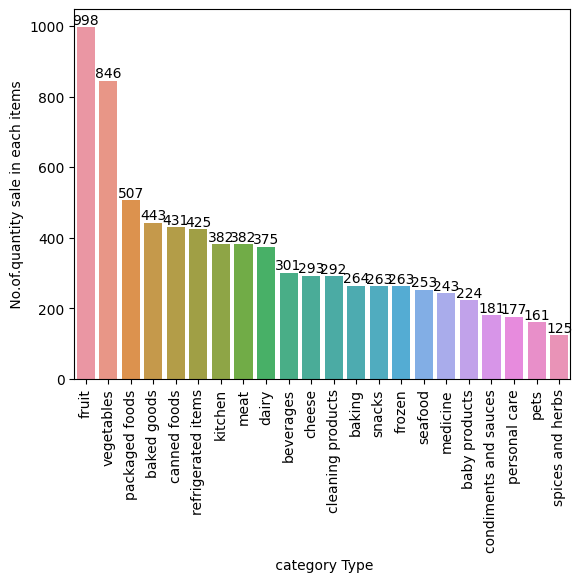

In [226]:
data = sns.countplot(x = 'category',data = df,order=df['category'].value_counts().index)
for label in data.containers:
    data.bar_label(label)
plt.xlabel(" category Type")
plt.ylabel(" No.of.quantity sale in each items ")
plt.xticks(rotation=90)
plt.show()

In [227]:
df['customer_type'].value_counts(),df['customer_type'].value_counts(normalize=True)

(non-member    1601
 standard      1595
 premium       1590
 basic         1526
 gold          1517
 Name: customer_type, dtype: int64,
 non-member    0.204496
 standard      0.203730
 premium       0.203091
 basic         0.194916
 gold          0.193767
 Name: customer_type, dtype: float64)

In [228]:
df.groupby(df['customer_type']).value_counts()

customer_type  timestamp            category           unit_price  quantity  total  payment_type
basic          2022-03-01 09:00:28  fruit              0.49        4         1.96   e-wallet        1
               2022-03-01 09:01:06  dairy              7.19        4         28.76  debit card      1
               2022-03-06 19:20:24  cleaning products  15.49       1         15.49  credit card     1
               2022-03-06 19:18:43  baby products      7.19        3         21.57  credit card     1
               2022-03-06 19:16:50  meat               12.49       3         37.47  cash            1
                                                                                                   ..
standard       2022-03-02 12:35:22  baked goods        4.99        1         4.99   cash            1
               2022-03-02 12:28:47  vegetables         1.49        3         4.47   e-wallet        1
               2022-03-02 12:28:02  vegetables         1.49        1         1.49   cre

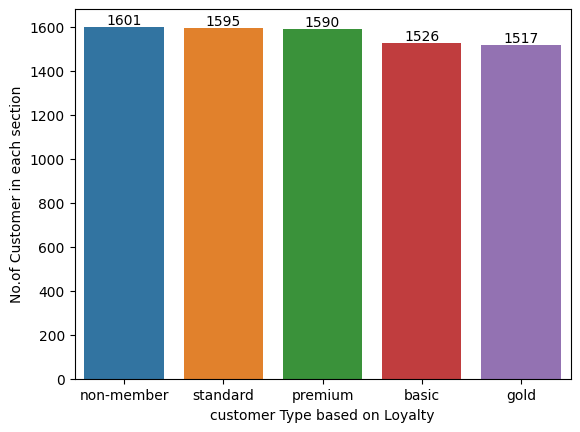

In [229]:
data = sns.countplot(x = 'customer_type',data = df,order = df['customer_type'].value_counts().index )
for label in data.containers:
    data.bar_label(label)
plt.xlabel("customer Type based on Loyalty")
plt.ylabel("No.of Customer in each section")
plt.show()

In [230]:
df['payment_type'].value_counts(),df['payment_type'].value_counts(normalize=True)

(cash           2027
 credit card    1949
 e-wallet       1935
 debit card     1918
 Name: payment_type, dtype: int64,
 cash           0.258909
 credit card    0.248946
 e-wallet       0.247158
 debit card     0.244987
 Name: payment_type, dtype: float64)

In [231]:
df.groupby(df['payment_type']).value_counts()

payment_type  timestamp            category       customer_type  unit_price  quantity  total
cash          2022-03-01 09:08:20  baby products  standard       12.49       2         24.98    1
              2022-03-01 09:10:48  fruit          premium        0.19        1         0.19     1
              2022-03-05 15:45:56  baked goods    non-member     4.19        4         16.76    1
              2022-03-05 15:44:06  dairy          non-member     9.49        4         37.96    1
              2022-03-05 15:43:12  meat           gold           11.49       1         11.49    1
                                                                                               ..
e-wallet      2022-03-03 11:05:29  pets           non-member     9.49        1         9.49     1
              2022-03-03 11:05:22  vegetables     premium        1.99        4         7.96     1
              2022-03-03 11:03:22  fruit          premium        3.99        3         11.97    1
              2022-03-03 

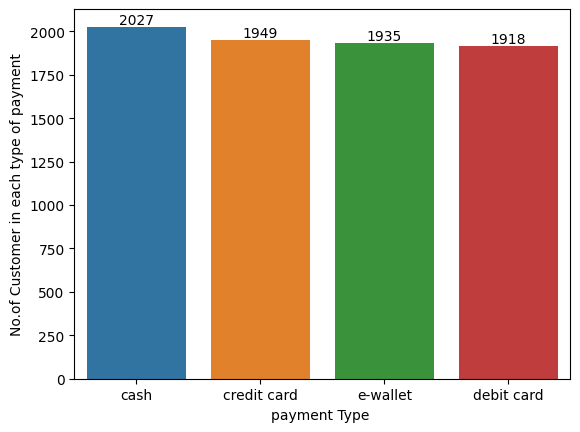

In [232]:
data = sns.countplot(x = 'payment_type',data = df, order =df['payment_type'].value_counts().index )
for label in data.containers:
    data.bar_label(label)
plt.xlabel("payment Type ")
plt.ylabel("No.of Customer in each type of payment")
plt.show()

The additional datasets are provided for the model development to find the insights and the solution for the problem.

In [233]:
sales = pd.read_csv("/content/drive/MyDrive/sample_sales_data.csv")
sales

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [234]:
sales = sales.drop('Unnamed: 0',axis=1)

In [235]:
sensor = pd.read_csv("/content/drive/MyDrive/sensor_stock_levels.csv")
sensor

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...,...
14995,14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [236]:
sensor = sensor.drop('Unnamed: 0',axis=1)

In [237]:
temperature_data = pd.read_csv("/content/drive/MyDrive/sensor_storage_temperature.csv")
temperature_data

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...,...
23885,23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


In [238]:
temperature_data = temperature_data.drop('Unnamed: 0',axis=1)

1.Data Cleaning

In [239]:
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [240]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [241]:
sales.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [242]:
sales['timestamp'] = pd.to_datetime(sales['timestamp'])

In [243]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [244]:
sales.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [245]:
sales.transaction_id.nunique()

7829

In [246]:
sales.transaction_id.isnull().sum()

0

In [247]:
sales.transaction_id.value_counts()

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64

In [248]:
sales.timestamp.nunique()

7738

In [249]:
sales.timestamp.isnull().sum()

0

In [250]:
sales.timestamp.value_counts()

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64

In [251]:
sales.product_id.isnull().sum()

0

In [252]:
sales.product_id.unique()

array(['3bc6c1ea-0198-46de-9ffd-514ae3338713',
       'ad81b46c-bf38-41cf-9b54-5fe7f5eba93e',
       '7c55cbd4-f306-4c04-a030-628cbe7867c1',
       '80da8348-1707-403f-8be7-9e6deeccc883',
       '7f5e86e6-f06f-45f6-bf44-27b095c9ad1d',
       '14736243-d346-438f-9535-d80fcb9f3882',
       '0ddc2379-adba-4fb0-aa97-19fcafc738a1',
       '35e00193-aa27-4121-87f4-6ac0d8a8671f',
       'ecac012c-1dec-41d4-9ebd-56fb7166f6d9',
       '04da844d-8dba-4470-9119-e534d52a03a0',
       '68edf843-f13c-4ac8-bcf7-b3062266dbbb',
       'abc7ecb4-9cbf-4276-8d2d-7bdac2ae5e9f',
       'a13bd36b-acd1-402a-a009-4d1472e5e34a',
       'c6ffd15f-c133-47a2-93e5-828eb4ad3e26',
       'bfb96a0d-e52e-4a88-8aba-ecb79e39441d',
       'ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8',
       '8fa6efd6-0cd5-4263-9ca9-6b8fd6ef0e3e',
       '01f3cdd9-8e9e-4dff-9b5c-69698a0388d0',
       '6370633a-ac41-42a1-a29e-56c14d63786f',
       '4c529bbb-2443-43c7-806d-6e09c86ea578',
       '89968f6a-b575-46ff-b71e-2238826be41b',
       '251f3

from the product_id we are able to clearly say that there are approximately more than are equal to 300 types of product in the grocery store.

In [253]:
sales.product_id.nunique()

300

In [254]:
sales.category.value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [255]:
sales.category.isnull().sum()

0

In [256]:
sales.category.unique(),sales.category.nunique()

(array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
        'spices and herbs', 'canned foods', 'packaged foods',
        'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
        'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
        'pets', 'personal care', 'medicine', 'kitchen',
        'cleaning products'], dtype=object),
 22)

In [257]:
sales.customer_type.value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [258]:
sales.customer_type.isnull().sum()

0

In [259]:
sales.customer_type.unique(),sales.customer_type.nunique()

(array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object),
 5)

In [260]:
sales.payment_type.unique(),sales.payment_type.nunique(),sales.payment_type.isnull().sum()

(array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object), 4, 0)

In [261]:
sales.payment_type.value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

In [262]:
sales.unit_price.unique()

array([ 3.99,  0.19,  4.49,  1.49,  0.49,  4.99,  1.99,  1.19,  4.19,
        2.49,  3.49,  5.99,  6.49,  8.19,  8.99, 10.99,  7.19,  6.19,
        6.99,  3.19, 12.49,  7.49, 13.49, 11.19, 11.49, 13.19, 11.99,
        9.49, 13.99,  5.49,  5.19,  2.19,  2.99,  8.49,  7.99,  9.19,
        9.99, 20.19, 15.99, 14.49, 14.19, 16.49, 16.19, 15.19, 10.49,
       19.99, 14.99, 12.19, 20.49, 18.49, 18.19, 10.19, 19.19, 19.49,
       12.99, 17.99, 16.99, 21.99, 23.99, 15.49, 22.19, 20.99, 18.99,
       17.19])

In [263]:
sales.unit_price.isnull().sum()

0

Outlier correction

In [264]:
# IQR approach unit_price

q3 = sales.unit_price.quantile(0.75)
q1 = sales.unit_price.quantile(0.25)
iqr = q3-q1
upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
lower_threshold,upper_threshold
sales.unit_price = sales.unit_price.clip(lower_threshold,upper_threshold)

In [265]:
sales.quantity.isnull().sum()

0

from this we able to see that mim quantity sale is 1 and max quantity sale is 4

In [266]:
sales.quantity.unique()

array([2, 1, 4, 3])

In [267]:
# IQR approach for quantity

q3 = sales.quantity.quantile(0.75)
q1 = sales.quantity.quantile(0.25)
iqr = q3-q1
iqr
upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
lower_threshold,upper_threshold
sales.quantity = sales.quantity.clip(lower_threshold,upper_threshold)

In [268]:
sales.total.isnull().sum()

0

In [269]:
sales.total.unique()

array([ 7.98,  3.99,  0.38,  0.76,  8.98, 15.96,  5.96,  1.47,  4.99,
       14.97,  1.96,  0.49,  1.49, 11.97, 13.47, 17.96,  9.98,  0.19,
        0.57,  4.47,  2.98, 19.96,  4.49,  0.98,  7.96,  4.76,  5.97,
        3.57,  3.98, 16.76,  2.49,  8.38,  4.19,  2.38,  1.99,  1.19,
        9.96,  7.47,  4.98, 12.57,  3.49,  5.99,  6.49, 24.57, 26.97,
       32.76, 43.96, 25.96, 17.98, 16.38,  7.19, 10.47, 32.97, 12.38,
       17.97, 19.47, 10.99,  6.99,  6.19,  8.99, 24.76, 14.38, 12.98,
       12.76, 13.98, 11.98, 23.96, 20.97, 35.96,  6.38,  6.98, 13.96,
        8.19,  9.57, 28.76,  3.19, 27.96, 21.98, 21.57, 18.57, 24.98,
       29.96, 53.96, 26.98, 13.49, 40.47, 22.38, 34.47, 14.98, 13.19,
       11.19, 35.97,  9.49, 33.57, 49.96, 18.98, 12.49, 55.96, 37.47,
       22.47, 26.38, 37.96, 39.57, 13.99, 23.98,  5.49, 47.96, 11.99,
       11.49, 52.76,  7.49, 27.98, 44.76, 45.96, 22.98, 16.47, 28.47,
       21.96, 41.97, 10.98, 15.57,  5.19,  4.38,  8.76, 10.38,  2.19,
        6.57, 20.76,

In [270]:
# IQR approach for total

q3 = sales.total.quantile(0.75)
q1 = sales.total.quantile(0.25)
iqr = q3-q1
iqr
upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
lower_threshold,upper_threshold
sales.total = sales.total.clip(lower_threshold,upper_threshold)

In [271]:
sales.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.815699,2.501597,19.315748
std,5.377507,1.122722,16.282040
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,21.990000,4.000000,61.320000


In [272]:
sales.corr()

,unit_price,quantity,total
unit_price,1.000000,0.024553,0.796214
quantity,0.024553,1.000000,0.527708
total,0.796214,0.527708,1.000000


In [273]:
sensor.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [274]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [275]:
sensor.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [276]:
sensor.timestamp = pd.to_datetime(sensor.timestamp)

In [277]:
sensor.product_id.isnull().sum()

0

In [278]:
sensor.id.isnull().sum()

0

In [279]:
temperature_data.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [280]:
temperature_data.id.isnull().sum()

0

In [281]:
temperature_data.timestamp = pd.to_datetime(temperature_data.timestamp)

In [282]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [283]:
temperature_data.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


In [284]:
# IQR approach for total

q3 = sales.total.quantile(0.75)
q1 = sales.total.quantile(0.25)
iqr = q3-q1
iqr
upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
lower_threshold,upper_threshold
sales.total = sales.total.clip(lower_threshold,upper_threshold)

In [285]:
sales = sales.drop_duplicates()

In [286]:
sensor = sensor.drop_duplicates()

In [287]:
temperature_data = temperature_data.drop_duplicates()

In [288]:
sales

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,61.32,cash


Data Aggregation

In [289]:
from datetime import datetime

def convert_to_datetime_hourly(data: pd.DataFrame = None, column: str = None):
  new_timestamp = data[column].tolist()
  new_timestamp = [i.strftime('%Y-%m-%d %H:00:00') for i in new_timestamp]
  new_timestamp = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_timestamp]
  data[column] = new_timestamp
  return data

In [290]:
convert_to_datetime_hourly(sales,'timestamp').head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [291]:
convert_to_datetime_hourly(sensor,'timestamp').head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [292]:
convert_to_datetime_hourly(temperature_data,'timestamp').head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [293]:
sales_agg = sales.groupby(['timestamp','product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11
...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [294]:
stock_agg = sensor.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [295]:
temp_agg = temperature_data.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


Data Merging

In [296]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [297]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [298]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [299]:
merged_df = merged_df.fillna(0)

In [300]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [301]:
product_categories = sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [302]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [303]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [304]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


In [305]:
merged_df.describe()

,estimated_stock_pct,quantity,temperature,unit_price
count,10845.000000,10845.000000,10845.000000,10845.000000
mean,0.505130,0.908529,-0.213678,8.928414
std,0.264519,1.787680,0.649671,5.363795
min,0.010000,0.000000,-1.847270,0.190000
25%,0.300000,0.000000,-0.657082,4.990000
50%,0.500000,0.000000,-0.230631,8.190000
75%,0.715000,1.000000,0.160429,12.490000
max,1.000000,15.000000,1.435938,21.990000


Feature Engineering

In [306]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_weekday'] = merged_df['timestamp'].dt.weekday
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_weekday,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,1,9


In [308]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_weekday,timestamp_hour,category_baby products,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,1,9,1,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,1,9,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,1,9,0,...,0,0,0,0,1,0,0,0,0,0


In [309]:
merged_df.isnull().sum()

product_id                        0
estimated_stock_pct               0
quantity                          0
temperature                       0
unit_price                        0
timestamp_day_of_month            0
timestamp_day_of_week             0
timestamp_weekday                 0
timestamp_hour                    0
category_baby products            0
category_baked goods              0
category_baking                   0
category_beverages                0
category_canned foods             0
category_cheese                   0
category_cleaning products        0
category_condiments and sauces    0
category_dairy                    0
category_frozen                   0
category_fruit                    0
category_kitchen                  0
category_meat                     0
category_medicine                 0
category_packaged foods           0
category_personal care            0
category_pets                     0
category_refrigerated items       0
category_seafood            

In [310]:
merged_df = merged_df.drop('product_id',axis=1)
merged_df

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_weekday,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.028850,11.19,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.028850,1.49,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.028850,14.19,1,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.028850,20.19,1,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.028850,8.19,1,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10840,0.50,4.0,-0.165077,4.99,7,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
10841,0.26,0.0,-0.165077,19.99,7,0,0,19,0,0,...,1,0,0,0,0,0,0,0,0,0
10842,0.78,3.0,-0.165077,6.99,7,0,0,19,0,0,...,0,0,1,0,0,0,0,0,0,0
10843,0.92,3.0,-0.165077,14.99,7,0,0,19,0,0,...,1,0,0,0,0,0,0,0,0,0


Modelling

In [311]:
X = merged_df.drop('estimated_stock_pct',axis=1)
y = merged_df['estimated_stock_pct']

In [312]:
X.shape,y.shape

((10845, 29), (10845,))

In [324]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor


In [317]:
# x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state = 42,stratify=merged_df['estimated_stock_pct'])

In [316]:
# And now let's create a loop to train `K` models with a 75/25% random split of the data each time between training and test samples

In [325]:
accuracy = []
K=10
for fold in range(K):

  # Instantiate Algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # train and test split
  x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state = 42)

  # Scaling the data using standard scaler
  scaler.fit(x_train)
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  # Training the model
  trained_model = model.fit(x_train_scaled,y_train)
  # Generate prediction on test set
  ypred = trained_model.predict(x_test_scaled)

  # compute error and accuracy score
  mae = mean_absolute_error(y_test,ypred)
  accuracy.append(mae)
  print(f"Fold {fold+1}: MAE = {mae:.3f}")

print(f"Average MAE:{(sum(accuracy)/len(accuracy)):.2f}")



Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.237
Fold 6: MAE = 0.237
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE:0.24


In [326]:
fimp = pd.Series(trained_model.feature_importances_, index = x_train.columns)
fimp.sort_values(ascending=False)

unit_price                        0.276311
temperature                       0.166857
timestamp_hour                    0.109776
quantity                          0.082302
timestamp_day_of_month            0.044491
timestamp_day_of_week             0.034438
timestamp_weekday                 0.033896
category_frozen                   0.014985
category_personal care            0.014983
category_baked goods              0.014343
category_beverages                0.014196
category_baby products            0.013691
category_cheese                   0.013596
category_cleaning products        0.013103
category_condiments and sauces    0.012474
category_canned foods             0.012284
category_baking                   0.012054
category_spices and herbs         0.010780
category_seafood                  0.010709
category_refrigerated items       0.010543
category_kitchen                  0.010298
category_dairy                    0.010282
category_packaged foods           0.010089
category_sn

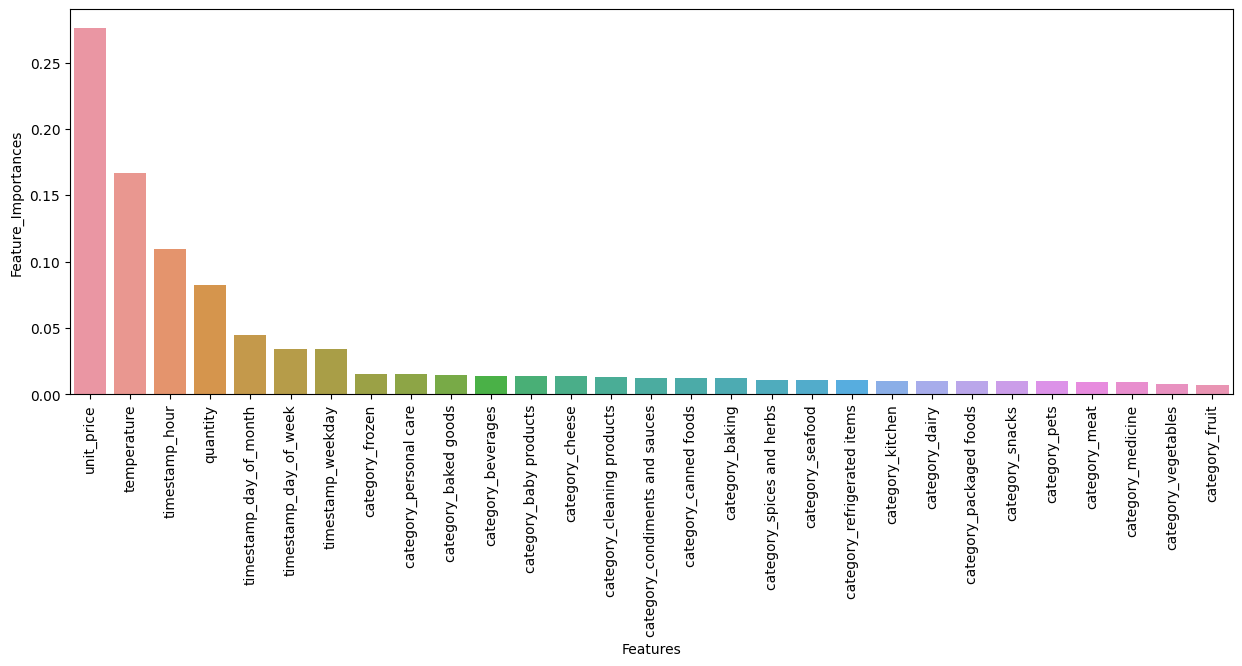

In [343]:
df = pd.DataFrame({"Features": X.columns, "Feature_Importances": trained_model.feature_importances_})
sort_df = df.sort_values(by="Feature_Importances", ascending=False)

features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 5))
sns.barplot(x=sort_df['Features'], y=sort_df['Feature_Importances'])
plt.xticks(rotation=90)
plt.show()

Deploying the model.

In [ ]:
# Load data
def load_data(path: str = "/path/to/csv/"):
    """
    This function takes a path string to a CSV file and loads it into
    a Pandas DataFrame.

    :param      path (optional): str, relative path of the CSV file

    :return     df: pd.DataFrame
    """

    df = pd.read_csv(f"{path}")
    df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
    return df

In [ ]:
# Create target variable and predictor variables
def create_target_and_predictors(
    data: pd.DataFrame = None,
    target: str = "estimated_stock_pct"
):
    """
    This function takes in a Pandas DataFrame and splits the columns
    into a target column and a set of predictor variables, i.e. X & y.
    These two splits of the data will be used to train a supervised
    machine learning model.

    :param      data: pd.DataFrame, dataframe containing data for the
                      model
    :param      target: str (optional), target variable that you want to predict

    :return     X: pd.DataFrame
                y: pd.Series
    """

    # Check to see if the target variable is present in the data
    if target not in data.columns:
        raise Exception(f"Target: {target} is not present in the data")

    X = data.drop(columns=[target])
    y = data[target]
    return X, y

In [ ]:
# Train algorithm
def train_algorithm_with_cross_validation(
    X: pd.DataFrame = None,
    y: pd.Series = None
):
    """
    This function takes the predictor and target variables and
    trains a Random Forest Regressor model across K folds. Using
    cross-validation, performance metrics will be output for each
    fold during training.

    :param      X: pd.DataFrame, predictor variables
    :param      y: pd.Series, target variable

    :return
    """

    # Create a list that will store the accuracies of each fold
    accuracy = []

    # Enter a loop to run K folds of cross-validation
    for fold in range(0, K):

        # Instantiate algorithm and scaler
        model = RandomForestRegressor()
        scaler = StandardScaler()

        # Create training and test samples
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=SPLIT, random_state=42)

        # Scale X data, we scale the data because it helps the algorithm to converge
        # and helps the algorithm to not be greedy with large values
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Train model
        trained_model = model.fit(X_train, y_train)

        # Generate predictions on test sample
        y_pred = trained_model.predict(X_test)

        # Compute accuracy, using mean absolute error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        accuracy.append(mae)
        print(f"Fold {fold + 1}: MAE = {mae:.3f}")

    # Finish by computing the average MAE across all folds
    print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")